Claudio Sartori 

Elaboration from the example given in [Sebastian Raschka](http://sebastianraschka.com), 2015

https://github.com/rasbt/python-machine-learning-book

# Machine Learning - Lab
## Working with Unlabeled Data – Clustering Analysis
### Find the best number of clusters with __k_means__

### Overview

- [Grouping objects by similarity using k-means](#Grouping-objects-by-similarity-using-k-means)
  - [Using the elbow method to find the optimal number of clusters](#Using-the-elbow-method-to-find-the-optimal-number-of-clusters)
  - [Quantifying the quality of clustering via silhouette plots](#Quantifying-the-quality-of-clustering-via-silhouette-plots)

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
%matplotlib inline

rnd_state = 42 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

# Grouping objects by similarity using k-means
In this example we will use an _artificial_ data set

 1. load the data file from `'ex1_4dim_data.csv'`
 2. check the shape and plot the content  
 3. observe the plot and decide which are the most interesting columns, to use in the plots of the clusters  
   - make a 2d plot of the two most promising columns  
 4. Use the elbow method to find the optimal number of clusters: test `KMeans` with varying number of clusters, from 2 to 10, fitting the data and computing the inertia and the silhouette score  
 5. Choose the optimal number of clusters looking at the plots, then cluster the data, plot the clusters and plot the scores of the individual samples 
 6. For comparison, repeat 5 with two clusters
        

In [2]:
data_file = 'ex1_4dim_data.csv'
delimiter = ','
data = pd.read_csv(data_file)

In [3]:
data.shape

(1499, 4)

In [4]:
data.head()

,4.371261353287005491e+00,3.594786230260296200e+00,4.763825395345159253e-01,9.877987214376289238e-01
0,-7.340429,-8.728576,0.711336,0.479905
1,-5.879899,-9.678722,0.830346,0.950050
2,5.995731,0.997347,0.690926,0.279734
3,8.762886,4.389902,0.019789,0.382706
4,-5.512489,-9.612021,0.454759,0.942106


In [5]:
data = data.rename(columns={'4.371261353287005491e+00':'A', '3.594786230260296200e+00':'B', '4.763825395345159253e-01':'C', '9.877987214376289238e-01':'D'}, errors='raise')
data.head()


,A,B,C,D
0,-7.340429,-8.728576,0.711336,0.479905
1,-5.879899,-9.678722,0.830346,0.950050
2,5.995731,0.997347,0.690926,0.279734
3,8.762886,4.389902,0.019789,0.382706
4,-5.512489,-9.612021,0.454759,0.942106


### 3. Observe the pairplots
In this simple example you can easily see that the two most interesting columns are `0` and `1`.

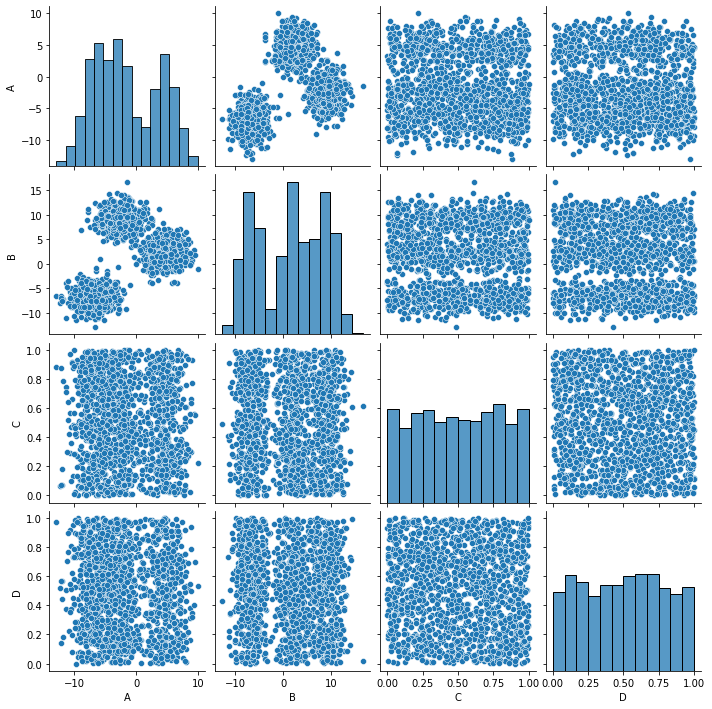

In [6]:
sns.pairplot(data)

In [7]:
from plot_clusters import plot_clusters

<AxesSubplot:xlabel='A', ylabel='B'>

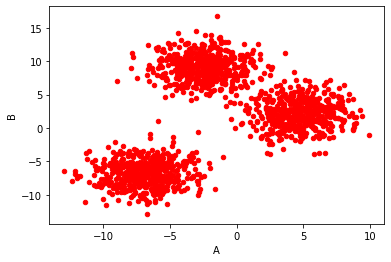

In [8]:
data.plot(kind='scatter',
          x = 'A',
          y = 'B',
          color = 'red')

In [9]:
X = data.drop(columns=['C','D'])
print(X.head())

          A         B
0 -7.340429 -8.728576
1 -5.879899 -9.678722
2  5.995731  0.997347
3  8.762886  4.389902
4 -5.512489 -9.612021


In [10]:
help(plot_clusters)

Help on function plot_clusters in module plot_clusters:

plot_clusters(X, y, dim, points, labels_prefix='cluster', points_name='centroids', colors=<matplotlib.colors.ListedColormap object at 0x0000022940C71460>, points_color=(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0))
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points



## Using the elbow method to find the optimal number of clusters 
We will try __k_means__ with a number of clusters varying from 2 to 10

- prepare two emptys lists for inertia and silhouette scores
- For each value of the number of clusters:  
  - initialize an estimator for `KMeans` and `fit_predict`
  - we will store the distortion (from the fitted model) in the variable `distortions`
  - using the function `silhouette_score` from `sklearn.metrics` with arguments the data and the fitted labels, we will fill the variable `silhouette_scores`

Then we will plot the two lists in the y axis, with the range of k in the x axis.
The plot with two different scales in the `y` axis can be done according to the example shown in the notebook `two_scales.ipynb`.

In [11]:
inertia = [];
siluette = [];

In [12]:
for j in range(2,11) :
    kmean = KMeans(n_clusters=j,
                random_state=0)

    label = kmean.fit_predict(X)

    inertia.append(kmean.inertia_)
    siluette.append(silhouette_score(X,label))

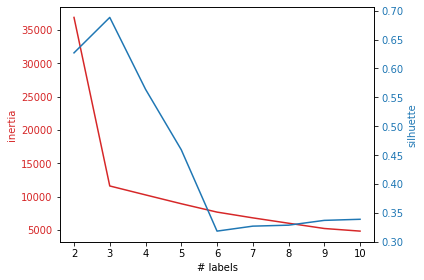

In [13]:
k = np.arange(2, 11)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('# labels')
ax1.set_ylabel('inertia', color=color)
ax1.plot(k, inertia, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhuette', color=color)  # we already handled the x-label with ax1
ax2.plot(k, siluette, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### 5. Cluster with the optimal number

Choose the best value of `n_clusters` using the elbow method and cluster the data, then print the centroids. 

In [14]:
inertia_der2 = []
for i in range(len(inertia)-2) :
    inertia_der2.append(inertia[i+2]-2*inertia[i+1]+inertia[i])
n_clusters = np.argmax(inertia_der2)+3
print(n_clusters)

3


Hint: for plot_clusters to work convert pandas to numpy.

[[-6.89370123 -6.83658926]
 [ 4.75184327  2.11554479]
 [-2.50474216  9.09132188]]


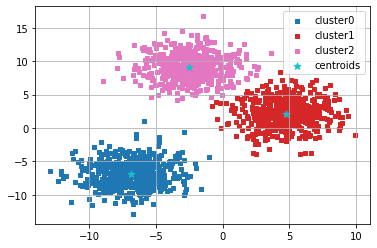

In [15]:
kmean = KMeans(n_clusters=n_clusters,
                random_state=0)
label = kmean.fit_predict(X)
centroids = kmean.cluster_centers_
print(centroids)
plot_clusters(X.to_numpy(),label,(0,1),centroids)

In [16]:
kmean.inertia_

11581.687215992977

## Quantifying the quality of clustering  via silhouette plots

In [17]:
from plot_silhouette import plot_silhouette

In [18]:
help(plot_silhouette)

Help on function plot_silhouette in module plot_silhouette:

plot_silhouette(silhouette_vals, y, colors=<matplotlib.colors.ListedColormap object at 0x0000022940C71460>)
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.
    
    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples



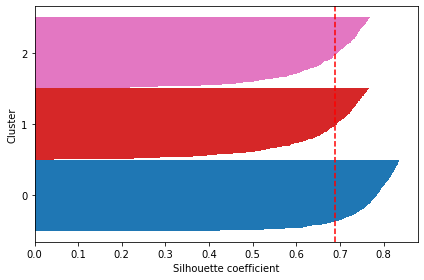

In [19]:
plot_silhouette(silhouette_samples(X,label),label)

### 6. Comparison to "bad" clustering:

In [20]:
# to fill

In [21]:
# to fill